<a href="https://colab.research.google.com/github/RafaelMagnusson1/Kaggle_comp/blob/main/SpaceTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importando os datasets

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Alura/Kaggle/Data/spaceship titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Alura/Kaggle/Data/spaceship titanic/test.csv")

In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Treating missing data

In [ ]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Age

In [ ]:
df_train["Age"].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64

In [ ]:
age_mean = 24
df_train["Age"] = df_train["Age"].fillna(age_mean)
df_train["Age"] = df_train["Age"].astype(int)

df_test["Age"] = df_test["Age"].fillna(age_mean)
df_test["Age"] = df_test["Age"].astype(int)

HomePlanet

In [ ]:
df_train["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
df_train["HomePlanet"] = df_train["HomePlanet"].fillna("Earth")
df_test["HomePlanet"] = df_test["HomePlanet"].fillna("Earth")

CryoSleep

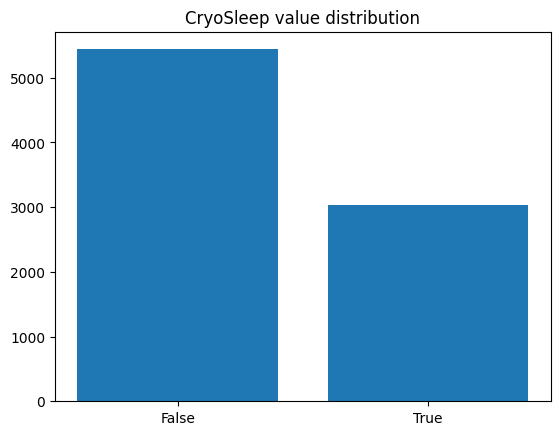

In [ ]:
plt.bar(["False","True"],df_train["CryoSleep"].value_counts())
plt.title("CryoSleep value distribution")
plt.show()

In [ ]:
df_train["CryoSleep"] = df_train["CryoSleep"].fillna("False")
df_test["CryoSleep"] = df_test["CryoSleep"].fillna("False")

Destination

In [ ]:
df_train["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
df_train["Destination"] = df_train["Destination"].fillna("TRAPPIST-1e")
df_test["Destination"] = df_test["Destination"].fillna("TRAPPIST-1e")

Cabin

In [ ]:
df_train["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
df_train["Cabin"] = df_train["Cabin"].fillna(method = "ffill")

VIP

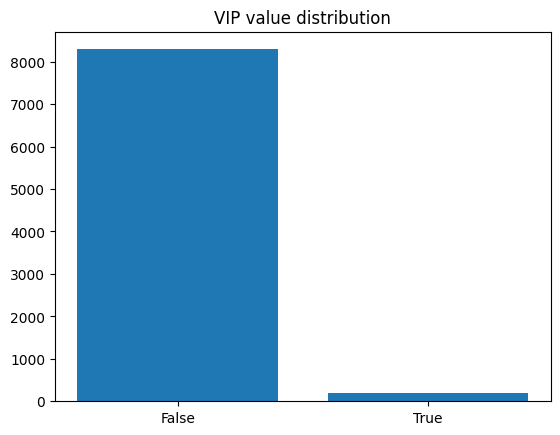

In [ ]:
plt.bar(["False","True"],df_train["VIP"].value_counts())
plt.title("VIP value distribution")
plt.show()

In [ ]:
df_train["VIP"] = df_train["VIP"].fillna("False")
df_test["VIP"] = df_test["VIP"].fillna("False")

Name

In [ ]:
df_train["Name"] = df_train["Name"].fillna("Unknow Unknow")
df_test["Name"] = df_test["Name"].fillna("Unknow Unknow")

Numeric values

In [ ]:
numeric_columns = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

In [ ]:
RoomService_median = df_train["RoomService"].median()
FoodCourt_median = df_train["FoodCourt"].median()
ShoppingMall_median = df_train["ShoppingMall"].median()
Spa_median = df_train["Spa"].median()
VRDeck_median = df_train["VRDeck"].median()

In [ ]:
df_train["RoomService"] = df_train["RoomService"].fillna(RoomService_median)
df_train["FoodCourt"] = df_train["FoodCourt"].fillna(FoodCourt_median)
df_train["ShoppingMall"] = df_train["ShoppingMall"].fillna(ShoppingMall_median)
df_train["Spa"] = df_train["Spa"].fillna(Spa_median)
df_train["VRDeck"] = df_train["VRDeck"].fillna(VRDeck_median)

In [ ]:
df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

## EDA

Categorical data

Text(0.5, 1.0, 'HomePlanet')

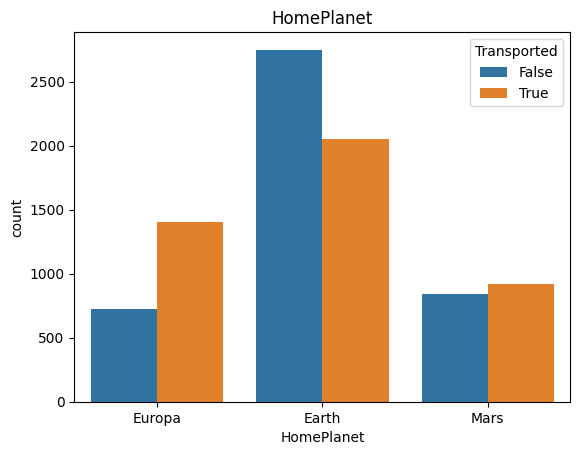

In [ ]:
ax =sns.countplot(data = df_train, x = "HomePlanet", hue = "Transported")
ax.set_title("HomePlanet")

Text(0.5, 1.0, 'CryoSleep')

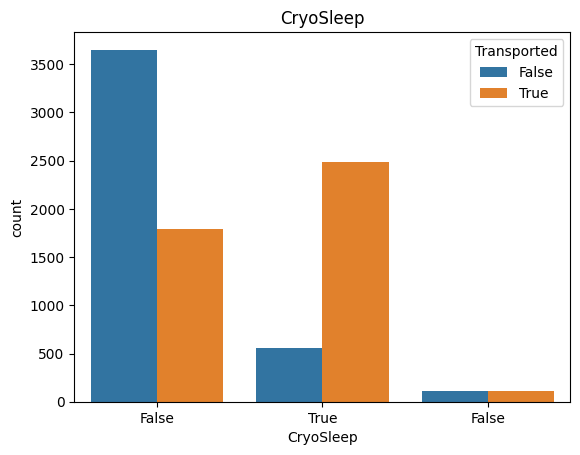

In [ ]:
ax =sns.countplot(data = df_train, x = "CryoSleep", hue = "Transported")
ax.set_title("CryoSleep")

Text(0.5, 1.0, 'Destination')

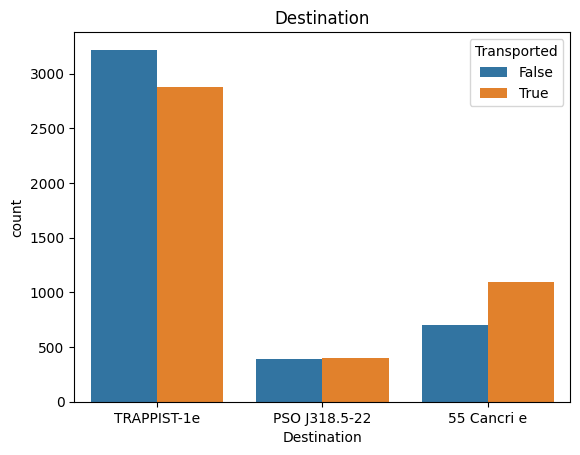

In [ ]:
ax =sns.countplot(data = df_train, x = "Destination", hue = "Transported")
ax.set_title("Destination")

In [ ]:
#The variable HomePlanet and Cryosleep seems to be useful to the model

Numeric data

In [ ]:
num = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

df_num = df_train[num]

df_num.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


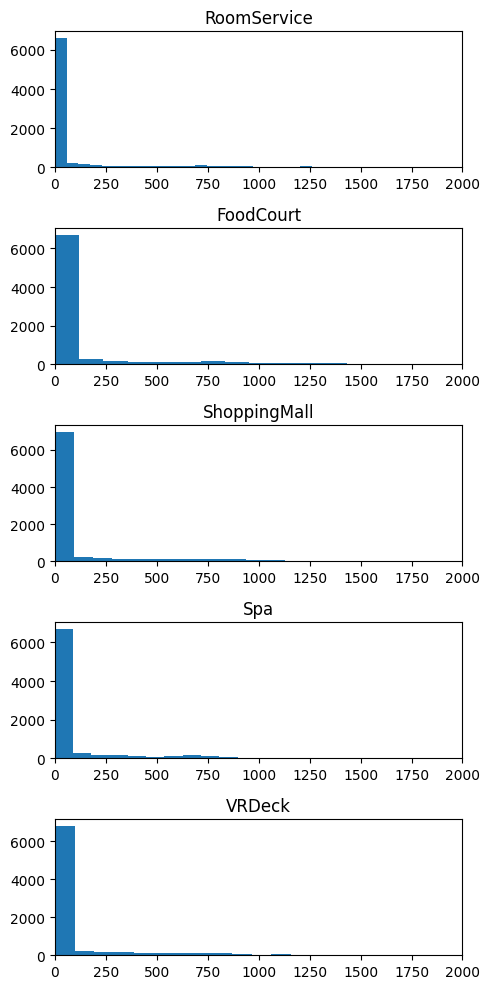

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(5, 10))

a = 0
for i in num:

  axs[a].hist(df_num[i],bins = 250)
  axs[a].set_xlim(0, 2000)
  axs[a].set_title(i)
  a += 1

plt.tight_layout()
plt.show()

The majority of the passangers didn't spent any money during the trip. Therefore, we can check if spenditure during travel has any correlation with transported

## Feature creation

Total expends

In [ ]:
df_train["Total expends"] = df_train[num].sum(axis = 1)
df_test["Total expends"] = df_test[num].sum(axis = 1)

Cabin side

In [ ]:
df_train["Cabin"].head(10)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [ ]:
df_train['Side'] = df_train['Cabin'].str.split('/').str[-1]
df_test['Side'] = df_test['Cabin'].str.split('/').str[-1]

Text(0.5, 1.0, 'Cabin side')

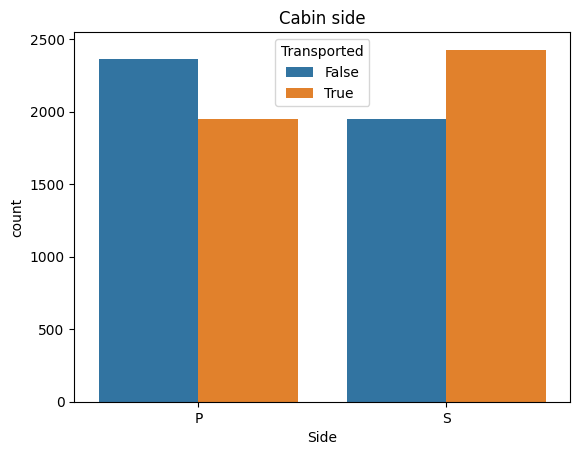

In [ ]:
ax = sns.countplot(data = df_train, x= "Side", hue = "Transported")
ax.set_title("Cabin side")

Categorical variable for money spend

In [ ]:
df_train["NoMoneySpent"]=(df_train['Total expends']==0).astype(int)
df_test["NoMoneySpent"]=(df_test['Total expends']==0).astype(int)

Text(0.5, 1.0, 'No money spent?')

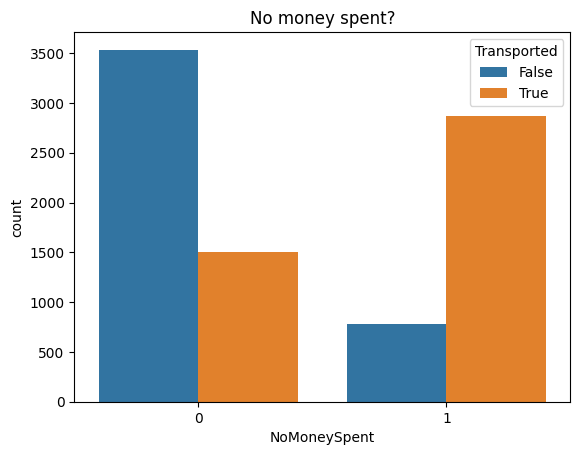

In [ ]:
ax = sns.countplot(data = df_train, x = "NoMoneySpent" , hue = "Transported")
ax.set_title("No money spent?")

In [ ]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total expends,Side,NoMoneySpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,P,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,S,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,S,0


## Data preprocessing

In [ ]:
features = ["HomePlanet","CryoSleep","Total expends","Side","NoMoneySpent","Transported"]
features_test = ["HomePlanet","CryoSleep","Total expends","Side","NoMoneySpent"]

In [ ]:
df_train_model = df_train[features]
df_test_model = df_test[features_test]
df_train_model.head()

,HomePlanet,CryoSleep,Total expends,Side,NoMoneySpent,Transported
0,Europa,False,0.0,P,1,False
1,Earth,False,736.0,S,0,True
2,Europa,False,10383.0,S,0,False
3,Europa,False,5176.0,S,0,False
4,Earth,False,1091.0,S,0,True


In [ ]:
df_train_dummies = pd.get_dummies(df_train_model)
df_test_dummies = pd.get_dummies(df_test_model)
df_train_dummies.head()

,Total expends,NoMoneySpent,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,CryoSleep_False,Side_P,Side_S
0,0.0,1,False,0,1,0,1,0,0,1,0
1,736.0,0,True,1,0,0,1,0,0,0,1
2,10383.0,0,False,0,1,0,1,0,0,0,1
3,5176.0,0,False,0,1,0,1,0,0,0,1
4,1091.0,0,True,1,0,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

## Model training

Data split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df_train_dummies.drop("Transported", axis = 1)
y = df_train_dummies["Transported"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Model selection

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric = "euclidean")

In [ ]:
knn.fit(X_train,y_train)
predict_knn = knn.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion = "entropy")

In [ ]:
dtc.fit(X_train,y_train)
predict_dtc = dtc.predict(X_test)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
bnb = BernoulliNB()

In [ ]:
bnb.fit(X_train,y_train)
predict_bnb = bnb.predict(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC() #Support vector Machine

In [ ]:
svm.fit(X_train,y_train)
predict_svm = svm.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)
predict_rf = rf.predict(X_test)

Model validation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
print(accuracy_score(y_test,predict_knn))

0.6780128794848206


In [ ]:
print(accuracy_score(y_test,predict_dtc))

0.6849126034958601


In [ ]:
print(accuracy_score(y_test,predict_bnb))

0.7424103035878565


In [ ]:
print(accuracy_score(y_test,predict_svm))

0.7382704691812327


In [ ]:
print(accuracy_score(y_test,predict_rf))

0.6839926402943882


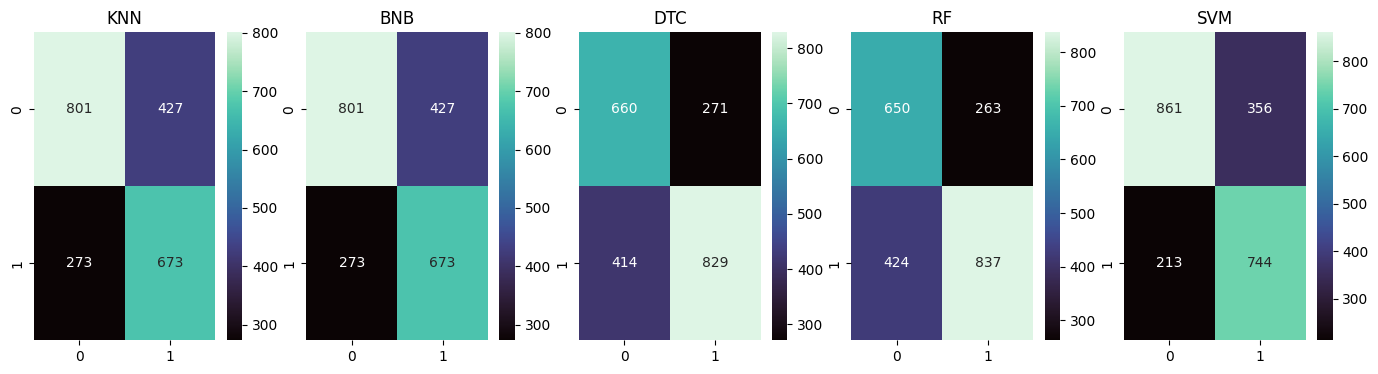

In [ ]:
plt.figure(figsize=(17,4))
plt.subplot(1,5,1)
plt.title("KNN")
sns.heatmap(confusion_matrix(predict_knn,y_test), annot = True,fmt=".0f", cmap = "mako")

plt.subplot(1,5,2)
plt.title("BNB")
sns.heatmap(confusion_matrix(predict_knn,y_test), annot = True, fmt=".0f",cmap = "mako")

plt.subplot(1,5,3)
plt.title("DTC")
sns.heatmap(confusion_matrix(predict_dtc,y_test), annot = True, fmt=".0f", cmap = "mako")

plt.subplot(1,5,4)
plt.title("RF")
sns.heatmap(confusion_matrix(predict_rf,y_test), annot = True, fmt=".0f", cmap = "mako")

plt.subplot(1,5,5)
plt.title("SVM")
sns.heatmap(confusion_matrix(predict_svm,y_test), annot = True, fmt=".0f", cmap = "mako")

plt.show()

Model fitting

In [ ]:
#The chosen model was Bnb

In [ ]:
bnb_def = BernoulliNB()
bnb_def.fit(X,y)

BernoulliNB()

Submiting the Data

In [ ]:
submission = bnb_def.predict(df_test_dummies)

In [ ]:
submission_df = pd.DataFrame({'PassengerId': df_test["PassengerId"], 'Transported': submission})
submission_df.to_csv('submission_SpaceTitanic.csv',index=False)